## **LLM Model GPT2 Architecture**

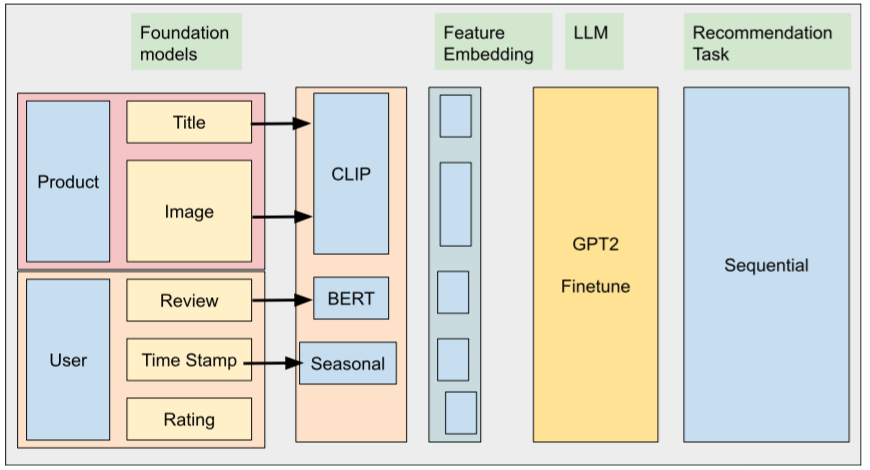


# **Basic Transformer Architecture**

<img src="https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F0235fd2f-26f4-47ff-b95e-eddf6a4593b0_782x1152.png" alt="placeholder" width="400" height="450">

image credit: https://cameronrwolfe.substack.com/p/language-models-gpt-and-gpt-2

## **GPT2 Architecture**

  <img src="https://www.researchgate.net/publication/373352176/figure/fig1/AS:11431281202501967@1698856108167/GPT-2-model-architecture-The-GPT-2-model-contains-N-Transformer-decoder-blocks-as-shown.ppm" alt="placeholder" width="400" height="400">


photo credit: https://www.researchgate.net/publication/373352176/figure/fig1/AS:11431281202501967@1698856108167/GPT-2-model-architecture-The-GPT-2-model-contains-N-Transformer-decoder-blocks-as-shown.ppm


### **Foundation Model CLIP architecture**


  <img src="https://images.ctfassets.net/kftzwdyauwt9/fbc4f633-9ad4-4dc2-3809c22df5e0/0bd2d5abf90d052731538613e4a42668/overview-a.svg" alt="placeholder" width="500" height="500">


<img src="https://images.ctfassets.net/kftzwdyauwt9/d9d46e4b-6d6a-4f9e-59a242ea1441/c7b386880f1af005fd02f159de7f4d00/overview-b.svg" alt="placeholder" width="500" height="500">

credit : https://openai.com/index/clip/

**Install libraries**

In [1]:
!pip install transformers datasets torch scikit-learn
!pip install pandas matplotlib statsmodels

**Import libraries**

In [2]:
import pandas as pd
import transformers
import datasets
import torch

**Import Amazon Beauty review dataset**

In [3]:
data_frame = pd.read_csv('/kaggle/input/second-stage-beauty/merge.csv') #Import Amazon Beauty review dataset

In [4]:
data_frame.head()

,Unnamed: 0,text,timestamp,rating,parent_asin,user_id,title,images,main_category,details,features,description,bought_together
0,0,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,5,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,Herbivore - Natural Sea Mist Texturizing Salt ...,[{'thumb': 'https://m.media-amazon.com/images/...,All Beauty,"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",[],"['If given the choice, weÕd leave most telltal...",NaN
1,1,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,4,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,All Natural Vegan Dry Shampoo Powder - Eco Fri...,[{'thumb': 'https://m.media-amazon.com/images/...,All Beauty,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",[],[],NaN
2,2,"Smells good, feels great!",2020-05-16 21:41:06.052,5,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,New Road Beauty - Creamsicle - Variety 3 Pack ...,[{'thumb': 'https://m.media-amazon.com/images/...,All Beauty,{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,"['Same Great Product, NEW PACKAGING.', 'MOISTU...",['New Road Beauty Paraffin Wax is recommended ...,NaN
3,3,Felt synthetic,2022-01-28 18:13:50.220,1,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,muaowig Ombre Body Wave Bundles 1B Grey Human ...,[{'thumb': 'https://m.media-amazon.com/images/...,All Beauty,"{'Brand': 'muaowig', 'Material': 'Human Hair',...",['?Hair Bundle Material?:Brazilian Virgin Huma...,"[""Hair Material: Brazilian Virgin Human Hair B...",NaN
4,4,Love it,2020-12-30 10:02:43.534,5,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Yinhua Electric Nail Drill Kit Portable Profes...,[{'thumb': 'https://m.media-amazon.com/images/...,All Beauty,{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,[],[],NaN


In [5]:
data_frame.shape

(701528, 13)

In [6]:
data_frame.columns

Index(['Unnamed: 0', 'text', 'timestamp', 'rating', 'parent_asin', 'user_id',
       'title', 'images', 'main_category', 'details', 'features',
       'description', 'bought_together'],
      dtype='object')

**Description of each columns**

* Text: Review of user
* Timestamp: time of purchase 
* Rating: user rating
* Parent_asin: product ID
* User_id: User ID
* Title: Title of each product
* Images: product image URL
* Main_category: 
* Details
* Features
* Description
* Bought_together

## **Exploratory Data Analysis**

### 1. **Select columns that need for my training and evaluation**

In [7]:
selected_columns = [
                    'title',
                    'parent_asin',
                    'description',
                    'images',
                    'user_id',
                    'text',
                    'timestamp',
                    'rating',
                    ]

In [8]:
selected_dataframe = data_frame[selected_columns]

In [10]:
selected_dataframe.head()

,title,parent_asin,description,images,user_id,text,timestamp,rating
0,Herbivore - Natural Sea Mist Texturizing Salt ...,B00YQ6X8EO,"['If given the choice, weÕd leave most telltal...",[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,5
1,All Natural Vegan Dry Shampoo Powder - Eco Fri...,B081TJ8YS3,[],[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,4
2,New Road Beauty - Creamsicle - Variety 3 Pack ...,B097R46CSY,['New Road Beauty Paraffin Wax is recommended ...,[{'thumb': 'https://m.media-amazon.com/images/...,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,"Smells good, feels great!",2020-05-16 21:41:06.052,5
3,muaowig Ombre Body Wave Bundles 1B Grey Human ...,B09JS339BZ,"[""Hair Material: Brazilian Virgin Human Hair B...",[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Felt synthetic,2022-01-28 18:13:50.220,1
4,Yinhua Electric Nail Drill Kit Portable Profes...,B08BZ63GMJ,[],[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Love it,2020-12-30 10:02:43.534,5


### 2. **Rename some columns with proper name**

In [11]:
# Renaming columns
selected_dataframe.rename(columns={'text': 'review', 'parent_asin': 'product_id'}, inplace=True)


/tmp/ipykernel_30/2074294134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_dataframe.rename(columns={'text': 'review', 'parent_asin': 'product_id'}, inplace=True)


In [12]:
selected_dataframe.head()

,title,product_id,description,images,user_id,review,timestamp,rating
0,Herbivore - Natural Sea Mist Texturizing Salt ...,B00YQ6X8EO,"['If given the choice, weÕd leave most telltal...",[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,5
1,All Natural Vegan Dry Shampoo Powder - Eco Fri...,B081TJ8YS3,[],[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,4
2,New Road Beauty - Creamsicle - Variety 3 Pack ...,B097R46CSY,['New Road Beauty Paraffin Wax is recommended ...,[{'thumb': 'https://m.media-amazon.com/images/...,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,"Smells good, feels great!",2020-05-16 21:41:06.052,5
3,muaowig Ombre Body Wave Bundles 1B Grey Human ...,B09JS339BZ,"[""Hair Material: Brazilian Virgin Human Hair B...",[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Felt synthetic,2022-01-28 18:13:50.220,1
4,Yinhua Electric Nail Drill Kit Portable Profes...,B08BZ63GMJ,[],[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Love it,2020-12-30 10:02:43.534,5


In [13]:
# check the size of data frame
selected_dataframe.shape

(701528, 8)

### 3. **Data cleaning**

In [14]:
print('info \n',selected_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        701444 non-null  object
 1   product_id   701528 non-null  object
 2   description  701528 non-null  object
 3   images       701528 non-null  object
 4   user_id      701528 non-null  object
 5   review       701316 non-null  object
 6   timestamp    701528 non-null  object
 7   rating       701528 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 42.8+ MB
info 
 None


In [15]:
print('Null \n',selected_dataframe.isnull().sum())

Null 
 title           84
product_id       0
description      0
images           0
user_id          0
review         212
timestamp        0
rating           0
dtype: int64


In [16]:
# Remove rows with any NaN values
selected_dataframe = selected_dataframe.dropna()

In [17]:
selected_dataframe.shape

(701232, 8)

In [18]:

print('Duplicate \n',selected_dataframe.duplicated().sum(), '\n \n')

Duplicate 
 7273 
 



3.1. **Remove duplicate**

In [19]:
selected_dataframe.drop_duplicates(inplace=True)

In [20]:
selected_dataframe.shape

(693959, 8)

In [21]:
selected_dataframe['title_length'] = selected_dataframe['title'].apply(lambda x: len(str(x).split()))
selected_dataframe['review_length'] = selected_dataframe['review'].apply(lambda x: len(str(x).split()))
print(selected_dataframe[['title_length', 'review_length']].describe())


        title_length  review_length
count  693959.000000  693959.000000
mean       18.402489      32.775124
std         8.643261      46.019824
min         1.000000       0.000000
25%        11.000000       8.000000
50%        18.000000      19.000000
75%        25.000000      40.000000
max       270.000000    2585.000000


**Plot the Title and Review word length**

<function matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, **kwargs)>

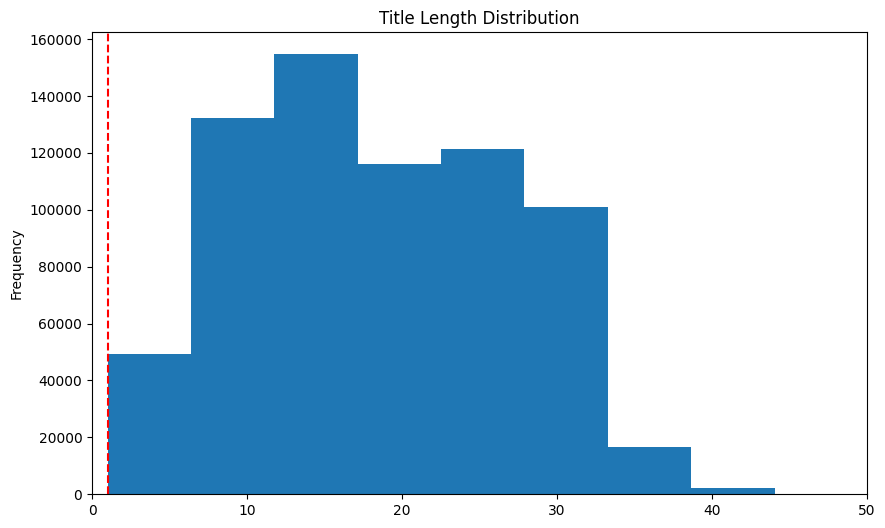

In [22]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'review_length' is the column
min_value = selected_dataframe['title_length'].min()
max_value = selected_dataframe['title_length'].max()

# Plot the histogram
plt.figure(figsize=(10, 6))
selected_dataframe['title_length'].plot(kind='hist', bins=50, title='Title Length Distribution')
# Set x-axis limit
plt.xlim(0, 50)

# Add vertical lines for min and max values
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Min: {min_value}')
plt.axvline


In [23]:
# Assuming `selected_dataframe` is your DataFrame

# Set the value to compare
value = 2

# Filter rows where 'title_length' is less than the given value
filtered_df = selected_dataframe[selected_dataframe['title_length'] < value]

# Display the first few rows of the filtered DataFrame
filtered_df.head(5)


,title,product_id,description,images,user_id,review,timestamp,rating,title_length,review_length
13,GAINWELL,B08JTNQFZY,[],[{'thumb': 'https://m.media-amazon.com/images/...,AFSKPY37N3C43SOI5IEXEK5JSIYA,"Really nice small brush. Made well, nice wood ...",2021-04-08 17:50:19.785,5,1,52
97,&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&,B07N45YN6C,[],[{'thumb': 'https://m.media-amazon.com/images/...,AHV6QCNBJNSGLATP56JAWJ3C4G2A,I've used sonic toothbrushes before. I like th...,2019-07-08 01:44:25.320,4,1,69
111,zh-er-0424-dv684,B00MDKICPK,[],[{'thumb': 'https://m.media-amazon.com/images/...,AHV6QCNBJNSGLATP56JAWJ3C4G2A,I am in my late 40's and always looking for ne...,2015-04-24 21:43:07.000,4,1,217
237,GAINWELL,B08JTNQFZY,[],[{'thumb': 'https://m.media-amazon.com/images/...,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,This is an exceptionally well-made and beautif...,2021-02-22 23:35:53.464,5,1,125
453,GAINWELL,B08JTNQFZY,[],[{'thumb': 'https://m.media-amazon.com/images/...,AGAM2CCKV52HI4YZU7ASZTSXA7YQ,I'm so amazed by boar bristle hairbrushes and ...,2021-02-10 22:04:38.917,5,1,138


In [24]:
# Regular expressions for special characters and numbers
only_special_characters_pattern = r'^[^a-zA-Z0-9\s]+$'  # Matches only special characters
only_numbers_pattern = r'^\d+$'  # Matches only numbers

# Filter rows with only special characters or only numbers
filtered_df = selected_dataframe[selected_dataframe['title'].str.match(only_special_characters_pattern) | 
                 selected_dataframe['title'].str.match(only_numbers_pattern)]

print("\nRows with only special characters or only numbers:")
filtered_df.head()



Rows with only special characters or only numbers:


,title,product_id,description,images,user_id,review,timestamp,rating,title_length,review_length
97,&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&,B07N45YN6C,[],[{'thumb': 'https://m.media-amazon.com/images/...,AHV6QCNBJNSGLATP56JAWJ3C4G2A,I've used sonic toothbrushes before. I like th...,2019-07-08 01:44:25.320,4,1,69
3812,&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&,B07N45YN6C,[],[{'thumb': 'https://m.media-amazon.com/images/...,AEYVPPWR4CIKWX4BGYKCBCDL2CZQ,I like this sonic toothbrush a lot - the color...,2019-07-09 20:15:45.558,4,1,165
4774,&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&,B07N45YN6C,[],[{'thumb': 'https://m.media-amazon.com/images/...,AFNTQDWERBYHZXFWZGWPWU3UQTTQ,Ready to use straight out of the box. The colo...,2019-06-28 17:01:36.793,4,1,91
11407,&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&,B00PB7HX3E,[],[{'thumb': 'https://m.media-amazon.com/images/...,AHFBCEEBGP53MRV34475KM3UCFZQ,did not work at 300 degrees they got so hot it...,2015-12-12 08:45:39.000,1,1,18
11677,&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&,B00PB7HX3E,[],[{'thumb': 'https://m.media-amazon.com/images/...,AHMENMCRHCAM7SF63S3PXI7C3MJA,Not sure if I really need two of these so gave...,2015-11-30 07:50:52.000,4,1,39


In [25]:
filtered_df.shape

(176, 10)

In [26]:
# Remove rows with only special characters or only numbers
df_cleaned = selected_dataframe[~(selected_dataframe['title'].str.match(only_special_characters_pattern) | 
                  selected_dataframe['title'].str.match(only_numbers_pattern))]

In [27]:
# Remove rows where 'title' is empty
df_cleaned = selected_dataframe[~selected_dataframe['title'].apply(lambda x: x == [] or x == "" or x == [""])]
df_cleaned.head()

,title,product_id,description,images,user_id,review,timestamp,rating,title_length,review_length
0,Herbivore - Natural Sea Mist Texturizing Salt ...,B00YQ6X8EO,"['If given the choice, weÕd leave most telltal...",[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,5,11,61
1,All Natural Vegan Dry Shampoo Powder - Eco Fri...,B081TJ8YS3,[],[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,4,31,47
2,New Road Beauty - Creamsicle - Variety 3 Pack ...,B097R46CSY,['New Road Beauty Paraffin Wax is recommended ...,[{'thumb': 'https://m.media-amazon.com/images/...,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,"Smells good, feels great!",2020-05-16 21:41:06.052,5,27,4
3,muaowig Ombre Body Wave Bundles 1B Grey Human ...,B09JS339BZ,"[""Hair Material: Brazilian Virgin Human Hair B...",[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Felt synthetic,2022-01-28 18:13:50.220,1,31,2
4,Yinhua Electric Nail Drill Kit Portable Profes...,B08BZ63GMJ,[],[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Love it,2020-12-30 10:02:43.534,5,31,2


In [28]:
df_cleaned.shape

(693959, 10)

**Check for Review**

<function matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, **kwargs)>

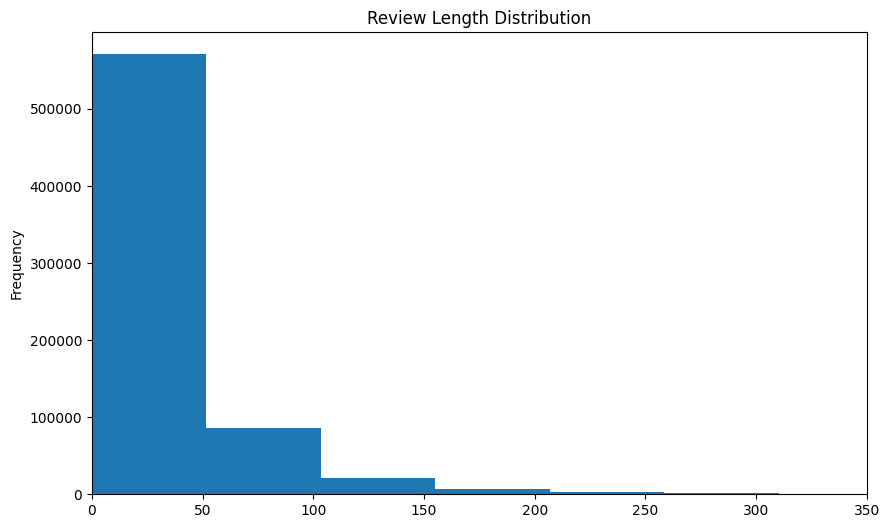

In [29]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'review_length' is the column
min_value = df_cleaned['review_length'].min()
max_value = df_cleaned['review_length'].max()

# Plot the histogram
plt.figure(figsize=(10, 6))
df_cleaned['review_length'].plot(kind='hist', bins=50, title='Review Length Distribution')
# Set x-axis limit
plt.xlim(0, 350)

# Add vertical lines for min and max values
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Min: {min_value}')
plt.axvline


In [30]:
import re
# Regular expressions for special characters and numbers
only_special_characters_pattern = r'^[^\w\s]+$'  # Matches only special characters (excluding letters, numbers, whitespace)
only_numbers_pattern = r'^\d+$'  # Matches only numbers

# Function to detect if a string contains only emojis
def is_only_emojis(text):
    emoji_pattern = re.compile(
        "[" 
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # miscellaneous symbols
        u"\U000024C2-\U0001F251" 
        "]+", 
        flags=re.UNICODE)
    return bool(emoji_pattern.fullmatch(text))

# Filter rows: remove only special characters or numbers but keep emojis
filtered_df = df_cleaned[
    ~((df_cleaned['review'].str.match(only_special_characters_pattern) | 
       df_cleaned['review'].str.match(only_numbers_pattern)) & 
      ~df_cleaned['review'].apply(is_only_emojis))
]
filtered_df.head()

,title,product_id,description,images,user_id,review,timestamp,rating,title_length,review_length
0,Herbivore - Natural Sea Mist Texturizing Salt ...,B00YQ6X8EO,"['If given the choice, weÕd leave most telltal...",[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,5,11,61
1,All Natural Vegan Dry Shampoo Powder - Eco Fri...,B081TJ8YS3,[],[{'thumb': 'https://m.media-amazon.com/images/...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,4,31,47
2,New Road Beauty - Creamsicle - Variety 3 Pack ...,B097R46CSY,['New Road Beauty Paraffin Wax is recommended ...,[{'thumb': 'https://m.media-amazon.com/images/...,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,"Smells good, feels great!",2020-05-16 21:41:06.052,5,27,4
3,muaowig Ombre Body Wave Bundles 1B Grey Human ...,B09JS339BZ,"[""Hair Material: Brazilian Virgin Human Hair B...",[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Felt synthetic,2022-01-28 18:13:50.220,1,31,2
4,Yinhua Electric Nail Drill Kit Portable Profes...,B08BZ63GMJ,[],[{'thumb': 'https://m.media-amazon.com/images/...,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,Love it,2020-12-30 10:02:43.534,5,31,2


In [31]:
filtered_df.shape

(693772, 10)

In [32]:
from collections import Counter
# Function to count special characters in text columns
def count_special_characters(df):
    special_char_counts = {}
    for col in df.columns:
        if df[col].dtype == 'object':  # Check for text-like columns
            counter = Counter()
            df[col].apply(lambda x: counter.update(
                ['None'] if x is None else 
                ['Empty String'] if str(x).strip() == '' else 
                ['Empty Brackets'] if str(x).strip() == '[]' else []
            ))
            special_char_counts[col] = counter
    return special_char_counts

# Run the function and get the counts
special_char_results = count_special_characters(filtered_df)
print(special_char_results)

{'title': Counter(), 'product_id': Counter(), 'description': Counter({'Empty Brackets': 522745}), 'images': Counter(), 'user_id': Counter(), 'review': Counter({'Empty String': 599}), 'timestamp': Counter()}


### **So Description columns have lots of empty rows 522571 out of 693596 so it's more than 75% so I have drop that columns**

In [33]:
filtered_df.drop('description', axis=1, inplace=True)

/tmp/ipykernel_30/3314132838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('description', axis=1, inplace=True)


In [34]:
filtered_df.shape

(693772, 9)

* Emojis:
Many commonly used emojis are included in GPT-2's vocabulary and are treated as single tokens.
Rare or complex emojis (like flags or skin-tone modifiers) may be split into multiple tokens.*


**Conclusion:**

*GPT-2's tokenizer can handle most emojis and special characters effectively, though:
Common emojis and characters are processed as single tokens.
Rare or complex sequences may increase tokenization length.*

In [35]:
filtered_df.drop(['title_length','review_length'],axis=1, inplace=True)

/tmp/ipykernel_30/3750955887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['title_length','review_length'],axis=1, inplace=True)


## **2.Feature extraction**

### **A. Time series analysis**

In [36]:
filtered_df = filtered_df.sort_values(['timestamp'])

In [37]:

filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_df['year'] = filtered_df['timestamp'].dt.year
filtered_df['month'] = filtered_df['timestamp'].dt.month
filtered_df['day'] = filtered_df['timestamp'].dt.day
filtered_df['day_of_week'] = filtered_df['timestamp'].dt.dayofweek
filtered_df['hour'] = filtered_df['timestamp'].dt.hour


In [38]:
filtered_df.head()

,title,product_id,images,user_id,review,timestamp,rating,year,month,day,day_of_week,hour
594949,Oral-B Professional Care 1000 Power Toothbrush,B000050FDE,[{'thumb': 'https://m.media-amazon.com/images/...,AED2GFGIAJ22PHMZGSKH2CPUF75Q,We have used Oral-B products for 15 years; thi...,2000-11-01 04:24:18,5,2000,11,1,2,4
590647,Oral-B Professional Care 1000 Power Toothbrush,B000050FDE,[{'thumb': 'https://m.media-amazon.com/images/...,AH54X3UMWTAMUJU2CVWYWNZVETLA,"I paid the full... for mine, but had to return...",2001-01-16 15:10:44,2,2001,1,16,1,15
143646,Philips Sonicare PL-4 (4700) Sonic Toothbrush,B000050AUD,[{'thumb': 'https://m.media-amazon.com/images/...,AHQGZITP7IEYTISSUELRAKFRH3GA,"First of all, I am not a dental professional.....",2001-01-30 17:13:34,5,2001,1,30,1,17
37437,Philips Sonicare PL-4 (4700) Sonic Toothbrush,B000050AUD,[{'thumb': 'https://m.media-amazon.com/images/...,AEG7T4QNZ2EZEE4QVV6WZB2LXCOQ,"I admit it, I put off buying the Sonicare beca...",2001-03-05 07:27:57,5,2001,3,5,0,7
422529,Philips Sonicare PL-4 (4700) Sonic Toothbrush,B000050AUD,[{'thumb': 'https://m.media-amazon.com/images/...,AHC4HE4WV6CUPI4K74KQ7YCPRPWA,I purchased this tooth brush about five years ...,2001-03-29 23:38:47,5,2001,3,29,3,23


In [39]:
def get_season(month):
    if month in [12, 1, 2]:
        return 1    # "Winter"
    elif month in [3, 4, 5]:
        return 2 #"Spring"
    elif month in [6, 7, 8]:
        return 3 #"Summer"
    elif month in [9, 10, 11]:
        return 4 #"Autumn"



In [40]:
import numpy as np

# Apply the function to the 'date' column and create a new 'season' column
filtered_df['season'] = filtered_df['month'].apply(get_season)

# cycle encoding
filtered_df['month_sin'] = np.sin(2 * np.pi * filtered_df['month'] / 12)
filtered_df['month_cos'] = np.cos(2 * np.pi * filtered_df['month'] / 12)

# Periodicity Features:
filtered_df['sin_hour'] = np.sin(2 * np.pi * filtered_df['hour'] / 24)
filtered_df['cos_hour'] = np.cos(2 * np.pi * filtered_df['hour'] / 24)

In [41]:
filtered_df.head()

,title,product_id,images,user_id,review,timestamp,rating,year,month,day,day_of_week,hour,season,month_sin,month_cos,sin_hour,cos_hour
594949,Oral-B Professional Care 1000 Power Toothbrush,B000050FDE,[{'thumb': 'https://m.media-amazon.com/images/...,AED2GFGIAJ22PHMZGSKH2CPUF75Q,We have used Oral-B products for 15 years; thi...,2000-11-01 04:24:18,5,2000,11,1,2,4,4,-0.5,8.660254e-01,0.866025,0.500000
590647,Oral-B Professional Care 1000 Power Toothbrush,B000050FDE,[{'thumb': 'https://m.media-amazon.com/images/...,AH54X3UMWTAMUJU2CVWYWNZVETLA,"I paid the full... for mine, but had to return...",2001-01-16 15:10:44,2,2001,1,16,1,15,1,0.5,8.660254e-01,-0.707107,-0.707107
143646,Philips Sonicare PL-4 (4700) Sonic Toothbrush,B000050AUD,[{'thumb': 'https://m.media-amazon.com/images/...,AHQGZITP7IEYTISSUELRAKFRH3GA,"First of all, I am not a dental professional.....",2001-01-30 17:13:34,5,2001,1,30,1,17,1,0.5,8.660254e-01,-0.965926,-0.258819
37437,Philips Sonicare PL-4 (4700) Sonic Toothbrush,B000050AUD,[{'thumb': 'https://m.media-amazon.com/images/...,AEG7T4QNZ2EZEE4QVV6WZB2LXCOQ,"I admit it, I put off buying the Sonicare beca...",2001-03-05 07:27:57,5,2001,3,5,0,7,2,1.0,6.123234e-17,0.965926,-0.258819
422529,Philips Sonicare PL-4 (4700) Sonic Toothbrush,B000050AUD,[{'thumb': 'https://m.media-amazon.com/images/...,AHC4HE4WV6CUPI4K74KQ7YCPRPWA,I purchased this tooth brush about five years ...,2001-03-29 23:38:47,5,2001,3,29,3,23,2,1.0,6.123234e-17,-0.258819,0.965926


In [42]:
filtered_df.shape

(693772, 17)

### **Filter Out less user interaction**

In [43]:
# Filter active users and items
min_user_interactions = 10
min_item_interactions = 5

# Filter users with sufficient interactions
user_counts = filtered_df['user_id'].value_counts()
filtered_users = user_counts[user_counts >= min_user_interactions].index
filtered_df_user = filtered_df[filtered_df['user_id'].isin(filtered_users)]
# Filter items with sufficient interactions
item_counts = filtered_df_user['product_id'].value_counts()
filtered_items = item_counts[item_counts >= min_item_interactions].index
filtered_df_interaction = filtered_df_user[filtered_df_user['product_id'].isin(filtered_items)]

print(f"Filtered Dataset: {filtered_df_interaction.shape}")

Filtered Dataset: (2622, 17)


## **Sentiment analysis for user review of product purchase**

In [44]:
from transformers import AutoTokenizer
import pandas as pd

# Load the tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [45]:
filtered_df_interaction.head()

,title,product_id,images,user_id,review,timestamp,rating,year,month,day,day_of_week,hour,season,month_sin,month_cos,sin_hour,cos_hour
269,PARWIN Infrared Flat Iron 1 1/4 Inch Digital H...,B07DPKZPRH,[{'thumb': 'https://m.media-amazon.com/images/...,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,[[VIDEOID:e487d57bdd82c5405085efb372c8fecd]]<b...,2018-12-20 00:19:59.508,3,2018,12,20,3,0,1,-2.449294e-16,1.000000,0.000000,1.000000
3928,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGYVC7KVHP2AWM7BDCEYNHFA6F3Q,This AG Hair Natural Remedy Apple Cider Vinega...,2018-12-21 22:44:47.894,4,2018,12,21,4,22,1,-2.449294e-16,1.000000,-0.500000,0.866025
229587,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AFSHXT5PTGDSFW2725SDXIE6ZVEA,This is a spritz for your hair that contains a...,2018-12-28 15:18:31.299,4,2018,12,28,4,15,1,-2.449294e-16,1.000000,-0.707107,-0.707107
10904,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGLGCQJ6R7DK2HOZRYGHMQ7D6BTA,This leave in hair remedy from AG smells wonde...,2019-01-06 19:59:08.666,4,2019,1,6,6,19,1,5.000000e-01,0.866025,-0.965926,0.258819
2888,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AH5HSMUMRJRDWBPFDQ6G3EAAOSFQ,"I love the natural ingredients, and the scent,...",2019-01-09 15:03:47.077,3,2019,1,9,2,15,1,5.000000e-01,0.866025,-0.707107,-0.707107


In [46]:

# Set model max length
max_length = 512

# Function to check for length issues
def check_row_length(text, index):
    tokens = tokenizer(text, return_tensors="pt", truncation=False, padding=False)  # No truncation/padding
    token_length = len(tokens["input_ids"][0])
    if token_length > max_length:
        print(f"Problematic Row Found: Index {index}, Length {token_length}")
        return True
    return False

# Apply the function row by row
filtered_df_interaction["is_problematic"] = [check_row_length(row, idx) for idx, row in enumerate(filtered_df_interaction["review"])]

Problematic Row Found: Index 12, Length 623
Problematic Row Found: Index 38, Length 547
Problematic Row Found: Index 106, Length 637
Problematic Row Found: Index 125, Length 597
Problematic Row Found: Index 160, Length 519
Problematic Row Found: Index 229, Length 977
Problematic Row Found: Index 260, Length 561
Problematic Row Found: Index 270, Length 870
Problematic Row Found: Index 303, Length 585
Problematic Row Found: Index 324, Length 656
Problematic Row Found: Index 355, Length 652
Problematic Row Found: Index 385, Length 618
Problematic Row Found: Index 577, Length 895
Problematic Row Found: Index 645, Length 594
Problematic Row Found: Index 685, Length 611
Problematic Row Found: Index 829, Length 675
Problematic Row Found: Index 860, Length 538
Problematic Row Found: Index 885, Length 1009
Problematic Row Found: Index 943, Length 534
Problematic Row Found: Index 962, Length 545
Problematic Row Found: Index 987, Length 576
Problematic Row Found: Index 1061, Length 634
Problemati

/tmp/ipykernel_30/2274985211.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_interaction["is_problematic"] = [check_row_length(row, idx) for idx, row in enumerate(filtered_df_interaction["review"])]


In [47]:
filtered_df_interaction.head()

,title,product_id,images,user_id,review,timestamp,rating,year,month,day,day_of_week,hour,season,month_sin,month_cos,sin_hour,cos_hour,is_problematic
269,PARWIN Infrared Flat Iron 1 1/4 Inch Digital H...,B07DPKZPRH,[{'thumb': 'https://m.media-amazon.com/images/...,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,[[VIDEOID:e487d57bdd82c5405085efb372c8fecd]]<b...,2018-12-20 00:19:59.508,3,2018,12,20,3,0,1,-2.449294e-16,1.000000,0.000000,1.000000,False
3928,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGYVC7KVHP2AWM7BDCEYNHFA6F3Q,This AG Hair Natural Remedy Apple Cider Vinega...,2018-12-21 22:44:47.894,4,2018,12,21,4,22,1,-2.449294e-16,1.000000,-0.500000,0.866025,False
229587,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AFSHXT5PTGDSFW2725SDXIE6ZVEA,This is a spritz for your hair that contains a...,2018-12-28 15:18:31.299,4,2018,12,28,4,15,1,-2.449294e-16,1.000000,-0.707107,-0.707107,False
10904,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGLGCQJ6R7DK2HOZRYGHMQ7D6BTA,This leave in hair remedy from AG smells wonde...,2019-01-06 19:59:08.666,4,2019,1,6,6,19,1,5.000000e-01,0.866025,-0.965926,0.258819,False
2888,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AH5HSMUMRJRDWBPFDQ6G3EAAOSFQ,"I love the natural ingredients, and the scent,...",2019-01-09 15:03:47.077,3,2019,1,9,2,15,1,5.000000e-01,0.866025,-0.707107,-0.707107,False


In [48]:
mapping_sentiment_to_integer_value = {
    'POSITIVE': 1,
    'NEUTRAL': 0,
    'NEGATIVE':-1,
    'LABEL_0': -1,
    'LABEL_1': 0,
    'LABEL_2': 1
}
from transformers import pipeline

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model = model_name,device=device, truncation=True, max_length=512 )

def get_sentiment(text, classifier = classifier , mapping_sentiment_to_integer_value = mapping_sentiment_to_integer_value):
    result = classifier(text)
    return mapping_sentiment_to_integer_value[result[0]['label']]



pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [49]:
filtered_df_interaction1 = filtered_df_interaction

In [50]:
from tqdm import tqdm

# Enable tqdm for pandas
tqdm.pandas()
filtered_df_interaction['sentiment'] = filtered_df_interaction['review'].apply(get_sentiment)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
/tmp/ipykernel_30/3825557204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_interaction['sentiment'] = filtered_df_interaction['review'].apply(get_sentiment)


In [53]:
filtered_df_interaction.head()

,title,product_id,images,user_id,review,timestamp,rating,year,month,day,day_of_week,hour,season,month_sin,month_cos,sin_hour,cos_hour,is_problematic,sentiment
269,PARWIN Infrared Flat Iron 1 1/4 Inch Digital H...,B07DPKZPRH,[{'thumb': 'https://m.media-amazon.com/images/...,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,[[VIDEOID:e487d57bdd82c5405085efb372c8fecd]]<b...,2018-12-20 00:19:59.508,3,2018,12,20,3,0,1,-2.449294e-16,1.000000,0.000000,1.000000,False,1
3928,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGYVC7KVHP2AWM7BDCEYNHFA6F3Q,This AG Hair Natural Remedy Apple Cider Vinega...,2018-12-21 22:44:47.894,4,2018,12,21,4,22,1,-2.449294e-16,1.000000,-0.500000,0.866025,False,1
229587,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AFSHXT5PTGDSFW2725SDXIE6ZVEA,This is a spritz for your hair that contains a...,2018-12-28 15:18:31.299,4,2018,12,28,4,15,1,-2.449294e-16,1.000000,-0.707107,-0.707107,False,1
10904,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGLGCQJ6R7DK2HOZRYGHMQ7D6BTA,This leave in hair remedy from AG smells wonde...,2019-01-06 19:59:08.666,4,2019,1,6,6,19,1,5.000000e-01,0.866025,-0.965926,0.258819,False,1
2888,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AH5HSMUMRJRDWBPFDQ6G3EAAOSFQ,"I love the natural ingredients, and the scent,...",2019-01-09 15:03:47.077,3,2019,1,9,2,15,1,5.000000e-01,0.866025,-0.707107,-0.707107,False,1


In [54]:
filtered_df_interaction.shape

(2622, 19)

### **Clip embedding for image**

In [55]:
from torchvision import transforms
from transformers import GPT2Tokenizer, GPT2Model, CLIPProcessor, CLIPModel, GPT2LMHeadModel, pipeline
import requests
from PIL import Image
from io import BytesIO
import ast

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_model.to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define the image transformations expected by CLIP
preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to CLIP's expected size
        transforms.ToTensor(),  # Convert to tensor
        # transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711]),  # Normalize
    ])


# Function to extract 'large' URLs
def extract_large_urls(images_text):
    try:
        images_list = ast.literal_eval(images_text)  # Safely parse the string into a Python object
        large_urls = [image['large'] for image in images_list if 'large' in image]
        return large_urls[0]
    except (ValueError, SyntaxError):  # Handle invalid formats
        return []
        
def extract_url(image):
    print(image)
    if 'large' in image:
        url = image.split('large')
        print('url', url)
        new_url = url.split("'")[1]
        return new_url
    else:
        return None
  


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [56]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import requests

# Initialize the CLIP model and processor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def image_embedding(url):
    """
    Fetches an image from a URL, processes it, and generates a normalized CLIP embedding.
    """
    # Fetch and preprocess the image
 
    image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
    # Preprocess the image using CLIPProcessor
    inputs = clip_processor(images=image, return_tensors="pt").to(device)  # Move inputs to GPU/CPU
    
    # Generate image embedding
    with torch.no_grad():
        image_embedding = clip_model.get_image_features(**inputs)
    
    # Normalize the image embedding
    image_embedding = image_embedding / image_embedding.norm(dim=-1, keepdim=True)
    return image_embedding




In [57]:
filtered_df_interaction['url'] = filtered_df_interaction['images'].apply(extract_large_urls)

/tmp/ipykernel_30/1768906838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_interaction['url'] = filtered_df_interaction['images'].apply(extract_large_urls)


In [ ]:
tqdm.pandas()
filtered_df_interaction['image_embedding'] = filtered_df_interaction['url'].progress_apply(image_embedding)

In [ ]:
filtered_df_interaction.head()

**Get title embedding**

In [ ]:
# from transformers import CLIPTokenizer, CLIPModel
# import torch

# # Define a function to get title embeddings
# def get_title_embedding(title, model_name="openai/clip-vit-base-patch32"):
#     """
#     Generates an embedding for the given title using the CLIP model.
    
#     Args:
#         title (str): The text title to embed.
#         model_name (str): The name of the pre-trained CLIP model.
        
#     Returns:
#         torch.Tensor: A tensor containing the title embedding.
#     """
#     # Load the CLIP model and tokenizer
#     model = CLIPModel.from_pretrained(model_name)
#     tokenizer = CLIPTokenizer.from_pretrained(model_name)
    
#     # Tokenize the input title
#     inputs = tokenizer(title, return_tensors="pt", padding=True, truncation=True, max_length=300)
    
#     # Get the text embeddings
#     with torch.no_grad():
#         text_embeddings = model.get_text_features(**inputs)
    
#     # Return the embedding
#     return text_embeddings


# embedding = get_title_embedding(title)




In [59]:
import torch
from transformers import CLIPTokenizer, CLIPModel

def get_title_embedding(title, model_name="openai/clip-vit-base-patch32"):
    """
    Generates an embedding for the given title using the CLIP model on GPU (if available).
    
    Args:
        title (str): The text title to embed.
        model_name (str): The name of the pre-trained CLIP model.
        
    Returns:
        torch.Tensor: A tensor containing the title embedding.
    """
    # Check for GPU availability
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the CLIP model and tokenizer
    model = CLIPModel.from_pretrained(model_name).to(device)  # Move model to GPU/CPU
    tokenizer = CLIPTokenizer.from_pretrained(model_name)
    
    # Tokenize the input title
    inputs = tokenizer(title, return_tensors="pt", padding=True, truncation=True, max_length=300).to(device)  # Move inputs to GPU/CPU
    
    # Get the text embeddings
    with torch.no_grad():
        text_embeddings = model.get_text_features(**inputs)
    
    # Return the embedding
    return text_embeddings




In [ ]:
tqdm.pandas()
filtered_df_interaction['title_embedding'] = filtered_df_interaction['title'].progress_apply(get_title_embedding)

In [ ]:
filtered_df_interaction.head()

In [ ]:
filtered_df_interaction.shape

In [ ]:
# Save DataFrame to a CSV file
csv_file_path = '/kaggle/working/output.csv'
filtered_df_interaction.to_csv(csv_file_path, index=False)

### **Calculate sparsity**

In [ ]:
import pandas as pd


# Number of users
num_users = filtered_df_interaction['user_id'].nunique()

# Number of items
num_items = filtered_df_interaction['product_id'].nunique()

# Total number of reviews
num_reviews = len(filtered_df_interaction)

# Total number of photos
num_photos = len(filtered_df_interaction)

# Calculate sparsity
total_possible_interactions = num_users * num_items
sparsity = (1 - num_reviews / total_possible_interactions) * 100

# Display results
print(f"Number of Users: {num_users}")
print(f"Number of Items: {num_items}")
print(f"Number of Reviews: {num_reviews}")
print(f"Number of Photos: {num_photos}")
print(f"Sparsity: {sparsity:.2f}%")


## **Group by user ID**

In [ ]:
import pandas as pd

In [61]:
group = pd.read_csv('/kaggle/input/third-stage/output.csv')

In [62]:
group.head()

,title,product_id,images,user_id,review,timestamp,rating,year,month,day,...,season,month_sin,month_cos,sin_hour,cos_hour,is_problematic,sentiment,url,image_embedding,title_embedding
0,PARWIN Infrared Flat Iron 1 1/4 Inch Digital H...,B07DPKZPRH,[{'thumb': 'https://m.media-amazon.com/images/...,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,[[VIDEOID:e487d57bdd82c5405085efb372c8fecd]]<b...,2018-12-20 00:19:59.508,3,2018,12,20,...,1,-2.449294e-16,1.000000,0.000000,1.000000,False,1,https://m.media-amazon.com/images/I/41f6wWini1...,"tensor([[-2.1490e-03, 7.3580e-03, -3.2185e-02...","tensor([[-1.2949e-01, -1.0290e-01, 4.1508e-02..."
1,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGYVC7KVHP2AWM7BDCEYNHFA6F3Q,This AG Hair Natural Remedy Apple Cider Vinega...,2018-12-21 22:44:47.894,4,2018,12,21,...,1,-2.449294e-16,1.000000,-0.500000,0.866025,False,1,https://m.media-amazon.com/images/I/31oLN+uIjj...,"tensor([[-2.1122e-02, -8.5909e-03, 1.0203e-02...","tensor([[ 3.2485e-02, 1.5063e-01, -3.4279e-01..."
2,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AFSHXT5PTGDSFW2725SDXIE6ZVEA,This is a spritz for your hair that contains a...,2018-12-28 15:18:31.299,4,2018,12,28,...,1,-2.449294e-16,1.000000,-0.707107,-0.707107,False,1,https://m.media-amazon.com/images/I/31oLN+uIjj...,"tensor([[-2.1122e-02, -8.5909e-03, 1.0203e-02...","tensor([[ 3.2485e-02, 1.5063e-01, -3.4279e-01..."
3,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AGLGCQJ6R7DK2HOZRYGHMQ7D6BTA,This leave in hair remedy from AG smells wonde...,2019-01-06 19:59:08.666,4,2019,1,6,...,1,5.000000e-01,0.866025,-0.965926,0.258819,False,1,https://m.media-amazon.com/images/I/31oLN+uIjj...,"tensor([[-2.1122e-02, -8.5909e-03, 1.0203e-02...","tensor([[ 3.2485e-02, 1.5063e-01, -3.4279e-01..."
4,AG Care Natural Remedy Apple Cider Vinegar Lea...,B0BG6WX4DH,[{'thumb': 'https://m.media-amazon.com/images/...,AH5HSMUMRJRDWBPFDQ6G3EAAOSFQ,"I love the natural ingredients, and the scent,...",2019-01-09 15:03:47.077,3,2019,1,9,...,1,5.000000e-01,0.866025,-0.707107,-0.707107,False,1,https://m.media-amazon.com/images/I/31oLN+uIjj...,"tensor([[-2.1122e-02, -8.5909e-03, 1.0203e-02...","tensor([[ 3.2485e-02, 1.5063e-01, -3.4279e-01..."


In [63]:
group.shape

(2622, 22)

Convert string to Tensor

In [64]:
import torch
import re


def convert_string_to_tensor(tensor_string):
    # Extract the numeric values from the string
    numeric_values = re.findall(r"[-+]?\d*\.\d+e[-+]?\d+|\d+\.\d+|\d+", tensor_string)
    
    # Convert to a PyTorch tensor
    tensor = torch.tensor([float(value) for value in numeric_values])
    
    # Reshape if necessary (based on original tensor's shape)
    tensor = tensor.view(1, -1)  # Example reshape for a 1-row tensor
    return tensor



In [ ]:
from tqdm import tqdm
tqdm.pandas()
group['title_embedding'] = group['title_embedding'].progress_apply(convert_string_to_tensor)

In [ ]:
group['image_embedding'] = group['image_embedding'].progress_apply(convert_string_to_tensor)

In [65]:
# Grouping by 'user_id' and aggregating the other columns into lists

# Specify the columns to aggregate
columns_to_aggregate = ['product_id','title_embedding','image_embedding', 'sentiment', 'rating','season']

# Group by 'user_id' and aggregate the specified columns
grouped = group.groupby('user_id')[columns_to_aggregate].agg(lambda x: x.tolist()).reset_index()


print(grouped.shape)
# Display the grouped DataFrame
grouped.head(5)


(289, 7)


,user_id,product_id,title_embedding,image_embedding,sentiment,rating,season
0,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,"[B089R7S73D, B081D2R47W, B087ZQK2G8, B0841WQNN...","[tensor([[-0.0148, 0.1554, 0.1315, 0.5394, ...","[tensor([[-6.9271e-02, -1.3871e-02, 7.1934e-0...","[1, 1, -1, 1, 1, 1, 1, 1, 1]","[3, 3, 3, 5, 4, 4, 5, 5, 4]","[3, 4, 4, 4, 4, 1, 1, 4, 3]"
1,AE2IGWDKOWONDB3FQFX3STYGWCNQ,"[B08DXLRTSB, B0851T7HDS, B08WHBSK6R, B08TR1MKH...","[tensor([[-3.1545e-02, -1.3547e-01, -3.9740e-0...","[tensor([[-3.9842e-02, 6.0670e-03, 6.0030e-0...","[-1, 1, 1, 1, 1]","[3, 3, 4, 5, 5]","[4, 4, 2, 2, 3]"
2,AE2O2C43KTYO4LXXGZWJZLE67GBQ,"[B07Q2G3FSY, B083J1Y349, B08KHRF9NY, B08QYW2FJ2]","[tensor([[ 1.0461e-01, 1.8533e-02, -7.2895e-0...","[tensor([[-5.7769e-03, 2.5902e-03, -1.5455e-0...","[0, 0, 1, 0]","[3, 4, 4, 4]","[2, 2, 2, 2]"
3,AE2WYNQPBMS67OHFWV63NI4MSJEA,"[B0BVQQ58G8, B0BXB4J297]","[tensor([[-2.0250e-01, -2.9853e-02, -1.3336e-0...","[tensor([[-4.0901e-02, 4.2396e-02, -2.7081e-0...","[1, 1]","[5, 4]","[3, 2]"
4,AE3KLVXGZPANXE5XLXYKHTVAZ3FQ,"[B01N7A5AGF, B08QHP717Z, B08SQ31H8P, B0895XPZN...","[tensor([[-2.6011e-01, -1.9571e-02, -3.0988e-0...","[tensor([[-1.0944e-02, 6.6568e-04, 1.7870e-0...","[0, 0, 1, 1, 1, 1, 1, 1, 1]","[4, 5, 5, 5, 4, 5, 5, 4, 4]","[1, 1, 2, 2, 2, 3, 3, 3, 3]"


In [ ]:
# Search for a specific user_id
search_id = 'AE2IGWDKOWONDB3FQFX3STYGWCNQ'
result = grouped[grouped['user_id'] == search_id]

# Display the result
result.head()

**Filter according to product count**

In [66]:
# Add product_count column to the grouped DataFrame
grouped['product_count'] = grouped['product_id'].apply(len)

In [67]:
grouped.head()

,user_id,product_id,title_embedding,image_embedding,sentiment,rating,season,product_count
0,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,"[B089R7S73D, B081D2R47W, B087ZQK2G8, B0841WQNN...","[tensor([[-0.0148, 0.1554, 0.1315, 0.5394, ...","[tensor([[-6.9271e-02, -1.3871e-02, 7.1934e-0...","[1, 1, -1, 1, 1, 1, 1, 1, 1]","[3, 3, 3, 5, 4, 4, 5, 5, 4]","[3, 4, 4, 4, 4, 1, 1, 4, 3]",9
1,AE2IGWDKOWONDB3FQFX3STYGWCNQ,"[B08DXLRTSB, B0851T7HDS, B08WHBSK6R, B08TR1MKH...","[tensor([[-3.1545e-02, -1.3547e-01, -3.9740e-0...","[tensor([[-3.9842e-02, 6.0670e-03, 6.0030e-0...","[-1, 1, 1, 1, 1]","[3, 3, 4, 5, 5]","[4, 4, 2, 2, 3]",5
2,AE2O2C43KTYO4LXXGZWJZLE67GBQ,"[B07Q2G3FSY, B083J1Y349, B08KHRF9NY, B08QYW2FJ2]","[tensor([[ 1.0461e-01, 1.8533e-02, -7.2895e-0...","[tensor([[-5.7769e-03, 2.5902e-03, -1.5455e-0...","[0, 0, 1, 0]","[3, 4, 4, 4]","[2, 2, 2, 2]",4
3,AE2WYNQPBMS67OHFWV63NI4MSJEA,"[B0BVQQ58G8, B0BXB4J297]","[tensor([[-2.0250e-01, -2.9853e-02, -1.3336e-0...","[tensor([[-4.0901e-02, 4.2396e-02, -2.7081e-0...","[1, 1]","[5, 4]","[3, 2]",2
4,AE3KLVXGZPANXE5XLXYKHTVAZ3FQ,"[B01N7A5AGF, B08QHP717Z, B08SQ31H8P, B0895XPZN...","[tensor([[-2.6011e-01, -1.9571e-02, -3.0988e-0...","[tensor([[-1.0944e-02, 6.6568e-04, 1.7870e-0...","[0, 0, 1, 1, 1, 1, 1, 1, 1]","[4, 5, 5, 5, 4, 5, 5, 4, 4]","[1, 1, 2, 2, 2, 3, 3, 3, 3]",9


In [68]:
print(grouped['product_count'].max())
print(grouped['product_count'].min())

61
1


In [70]:

# Find maximum and minimum values in 'product_count'
max_value = 10
min_value =3

# Filter rows where 'product_count' is between min_value and max_value (inclusive)
final_dataframe = grouped[(grouped['product_count'] <= max_value) & (grouped['product_count'] >= min_value)]

print('shape of final dataframe', final_dataframe.shape)
# Display the filtered DataFrame
final_dataframe.head()

shape of final dataframe (186, 8)


,user_id,product_id,title_embedding,image_embedding,sentiment,rating,season,product_count
0,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,"[B089R7S73D, B081D2R47W, B087ZQK2G8, B0841WQNN...","[tensor([[-0.0148, 0.1554, 0.1315, 0.5394, ...","[tensor([[-6.9271e-02, -1.3871e-02, 7.1934e-0...","[1, 1, -1, 1, 1, 1, 1, 1, 1]","[3, 3, 3, 5, 4, 4, 5, 5, 4]","[3, 4, 4, 4, 4, 1, 1, 4, 3]",9
1,AE2IGWDKOWONDB3FQFX3STYGWCNQ,"[B08DXLRTSB, B0851T7HDS, B08WHBSK6R, B08TR1MKH...","[tensor([[-3.1545e-02, -1.3547e-01, -3.9740e-0...","[tensor([[-3.9842e-02, 6.0670e-03, 6.0030e-0...","[-1, 1, 1, 1, 1]","[3, 3, 4, 5, 5]","[4, 4, 2, 2, 3]",5
2,AE2O2C43KTYO4LXXGZWJZLE67GBQ,"[B07Q2G3FSY, B083J1Y349, B08KHRF9NY, B08QYW2FJ2]","[tensor([[ 1.0461e-01, 1.8533e-02, -7.2895e-0...","[tensor([[-5.7769e-03, 2.5902e-03, -1.5455e-0...","[0, 0, 1, 0]","[3, 4, 4, 4]","[2, 2, 2, 2]",4
4,AE3KLVXGZPANXE5XLXYKHTVAZ3FQ,"[B01N7A5AGF, B08QHP717Z, B08SQ31H8P, B0895XPZN...","[tensor([[-2.6011e-01, -1.9571e-02, -3.0988e-0...","[tensor([[-1.0944e-02, 6.6568e-04, 1.7870e-0...","[0, 0, 1, 1, 1, 1, 1, 1, 1]","[4, 5, 5, 5, 4, 5, 5, 4, 4]","[1, 1, 2, 2, 2, 3, 3, 3, 3]",9
5,AE3LUVAAITFJIUTWBMRPHDQOCOFQ,"[B085RQKWNF, B08FBHNBP1, B08C72C56Z, B08BB3P4V...","[tensor([[-2.2552e-01, -6.0454e-02, -2.4391e-0...","[tensor([[-2.6112e-03, 1.8246e-02, -1.1024e-0...","[1, -1, 1, 1, 1, 1, -1, -1, 1]","[5, 3, 5, 4, 3, 4, 3, 2, 4]","[3, 4, 4, 4, 4, 4, 1, 4, 3]",9


Applications
* Seasonal Analysis: Understand product demand during holidays or seasons.
* Customer Behavior: Identify when customers are most active.
* Sales Optimization: Plan marketing and promotions for peak periods.
* Demand Prediction: Use historical trends to forecast future sales.

## **3.Sequential recommendation**

Input to GPT2 - EMbedding size of 768
1. Title
2. Image
3. Review
4. Rating
5. Seasonal

In [71]:
selected_columns = ['title_embedding', 'image_embedding', 'sentiment', 'rating', 'season']
selected_column_df = final_dataframe[selected_columns]

In [72]:
# Save the DataFrame to a .pkl file
selected_column_df.to_pickle("tensor_dataframe.pkl")

In [73]:
import pandas as pd
from tqdm import tqdm 

In [74]:
# Load the DataFrame from the .pkl file
selected_column_df = pd.read_pickle("/kaggle/input/fourth-stage/tensor_dataframe.pkl")

# Verify the DataFrame contents
selected_column_df.head()

,title_embedding,image_embedding,sentiment,rating,season
0,"[[[tensor(0.0148), tensor(0.1554), tensor(0.13...","[[[tensor(-0.0693), tensor(-0.0139), tensor(0....","[1, 1, -1, 1, 1, 1, 1, 1, 1]","[3, 3, 3, 5, 4, 4, 5, 5, 4]","[3, 4, 4, 4, 4, 1, 1, 4, 3]"
1,"[[[tensor(-0.0315), tensor(-0.1355), tensor(-0...","[[[tensor(-0.0398), tensor(0.0061), tensor(0.0...","[-1, 1, 1, 1, 1]","[3, 3, 4, 5, 5]","[4, 4, 2, 2, 3]"
2,"[[[tensor(0.1046), tensor(0.0185), tensor(-0.0...","[[[tensor(-0.0058), tensor(0.0026), tensor(-0....","[0, 0, 1, 0]","[3, 4, 4, 4]","[2, 2, 2, 2]"
4,"[[[tensor(-0.2601), tensor(-0.0196), tensor(-0...","[[[tensor(-0.0109), tensor(0.0007), tensor(0.0...","[0, 0, 1, 1, 1, 1, 1, 1, 1]","[4, 5, 5, 5, 4, 5, 5, 4, 4]","[1, 1, 2, 2, 2, 3, 3, 3, 3]"
5,"[[[tensor(-0.2255), tensor(-0.0605), tensor(-0...","[[[tensor(-0.0026), tensor(0.0182), tensor(-0....","[1, -1, 1, 1, 1, 1, -1, -1, 1]","[5, 3, 5, 4, 3, 4, 3, 2, 4]","[3, 4, 4, 4, 4, 4, 1, 4, 3]"


In [ ]:
# n_title = 200
# n_image = 418
# n_review = 80
# n_rating = 30
# n_seasonal = 40

# n_gpt2 = 768

# print((n_gpt2 - n_review - n_rating - n_seasonal - n_title))


In [75]:
n_title = 200
n_image = 418
n_review = 80
n_rating = 30
n_seasonal = 40

n_gpt2 = 768

print((n_gpt2 - n_review - n_rating - n_seasonal - n_title))


418


In [76]:
import torch
from torch.nn import Embedding
import torch.nn as nn



def convert_embedding(input_tensor,is_tensor ,m):
    # Define a linear transformation layer
    if is_tensor:
        n = input_tensor.shape[1]
    else:
        n=1
    linear_layer = nn.Linear(n, m)
    
    # Reshape input tensor to match Linear layer's input requirements
    input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension: torch.Size([1, n])
    
    # Transform the tensor
    output_tensor = linear_layer(input_tensor)  # Output: torch.Size([1, m])
    
    # Remove batch dimension if necessary
    output_tensor = output_tensor.squeeze(0)  # Final output: torch.Size([m])
    return output_tensor




def create_embedding(tensor, n_length , is_tensor = False ):
    # Create an embedding layer
    if is_tensor:
        embedding_layer = convert_embedding(tensor,is_tensor, n_length)
    else:
        if tensor.item() < 0:
            tensor = torch.abs(tensor)
        embedding_layer = convert_embedding(tensor,is_tensor, n_length)
    return embedding_layer

### **Input to GPT2**

In [77]:
selected_column_df.head()

,title_embedding,image_embedding,sentiment,rating,season
0,"[[[tensor(0.0148), tensor(0.1554), tensor(0.13...","[[[tensor(-0.0693), tensor(-0.0139), tensor(0....","[1, 1, -1, 1, 1, 1, 1, 1, 1]","[3, 3, 3, 5, 4, 4, 5, 5, 4]","[3, 4, 4, 4, 4, 1, 1, 4, 3]"
1,"[[[tensor(-0.0315), tensor(-0.1355), tensor(-0...","[[[tensor(-0.0398), tensor(0.0061), tensor(0.0...","[-1, 1, 1, 1, 1]","[3, 3, 4, 5, 5]","[4, 4, 2, 2, 3]"
2,"[[[tensor(0.1046), tensor(0.0185), tensor(-0.0...","[[[tensor(-0.0058), tensor(0.0026), tensor(-0....","[0, 0, 1, 0]","[3, 4, 4, 4]","[2, 2, 2, 2]"
4,"[[[tensor(-0.2601), tensor(-0.0196), tensor(-0...","[[[tensor(-0.0109), tensor(0.0007), tensor(0.0...","[0, 0, 1, 1, 1, 1, 1, 1, 1]","[4, 5, 5, 5, 4, 5, 5, 4, 4]","[1, 1, 2, 2, 2, 3, 3, 3, 3]"
5,"[[[tensor(-0.2255), tensor(-0.0605), tensor(-0...","[[[tensor(-0.0026), tensor(0.0182), tensor(-0....","[1, -1, 1, 1, 1, 1, -1, -1, 1]","[5, 3, 5, 4, 3, 4, 3, 2, 4]","[3, 4, 4, 4, 4, 4, 1, 4, 3]"


In [78]:
# Propose method data preparation embedding with season time feature
combined_list = []

for idx, row in tqdm(selected_column_df.iterrows()):
        sequence_feature = []
        for i in range(len(row['title_embedding'])):
            title_embedding = create_embedding(row['title_embedding'][i],200, True)
            image_embedding = create_embedding(row['image_embedding'][i],418, True)
            sentiment = create_embedding(torch.tensor([row['sentiment'][i]], dtype=torch.float32),80)
            rating = create_embedding(torch.tensor([row['rating'][i]],dtype=torch.float32),30)
            season = create_embedding(torch.tensor(row['season'][i],dtype=torch.float32),40)
            row_combined = torch.cat([title_embedding.squeeze(0),image_embedding.squeeze(0), sentiment,rating, season])
            
            sequence_feature.append(row_combined)
        combined_list.append(sequence_feature)


186it [00:05, 36.74it/s]


In [107]:
# Baseline data preparation embedding without season time feature
combined_list = []

for idx, row in tqdm(selected_column_df.iterrows()):
        sequence_feature = []
        for i in range(len(row['title_embedding'])):
            title_embedding = create_embedding(row['title_embedding'][i],200, True)
            image_embedding = create_embedding(row['image_embedding'][i],418, True)
            sentiment = create_embedding(torch.tensor([row['sentiment'][i]], dtype=torch.float32),80)
            rating = create_embedding(torch.tensor([row['rating'][i]],dtype=torch.float32),30)
            season = create_embedding(torch.tensor(0,dtype=torch.float32),40)
            row_combined = torch.cat([title_embedding.squeeze(0),image_embedding.squeeze(0), sentiment,rating, season])
            
            sequence_feature.append(row_combined)
        combined_list.append(sequence_feature)


186it [00:13, 13.46it/s]


In [108]:
import pandas as pd


# Convert to DataFrame with X (input sequence) and Y (target) columns with padding
def create_dataframe(data):
    rows = []
    
    id =0 
    for sequence in data:
        X = sequence[:-1]  # p1, ..., pn-1
        if len(X) < 9:
            difference = 9 - len(X)
            zero_torch = torch.zeros(768)
            for j in range(difference):
                X.append(zero_torch)
        # Concatenate along the first dimension
        Y = sequence[-1]   # pn
        rows.append({'X': torch.stack(X), 'Y': Y})
        id += 1

    return pd.DataFrame(rows)

# Create the DataFrame
df = create_dataframe(combined_list)

# Display the DataFrame
df.head()

,X,Y
0,"[[tensor(-0.4231, grad_fn=<UnbindBackward0>), ...","[tensor(-0.0998, grad_fn=<UnbindBackward0>), t..."
1,"[[tensor(0.0201, grad_fn=<UnbindBackward0>), t...","[tensor(0.1212, grad_fn=<UnbindBackward0>), te..."
2,"[[tensor(0.0936, grad_fn=<UnbindBackward0>), t...","[tensor(0.1431, grad_fn=<UnbindBackward0>), te..."
3,"[[tensor(-0.2528, grad_fn=<UnbindBackward0>), ...","[tensor(0.1236, grad_fn=<UnbindBackward0>), te..."
4,"[[tensor(-0.2013, grad_fn=<UnbindBackward0>), ...","[tensor(-0.3088, grad_fn=<UnbindBackward0>), t..."


In [ ]:
for idx, row in df.iterrows():
    print( len(row['X']),)
    print(row['Y'].shape)

    if idx > 5:
        break

**Data loader**

In [80]:
from torch.utils.data import Dataset

In [81]:
import torch
from torch.utils.data import Dataset

class SequentialRecommendationDataset(Dataset):
    def __init__(self, dataframe):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame containing 'X' and 'Y' columns.
                - 'X': List of embeddings (e.g., [p1_embedding, ..., pn-1_embedding]).
                - 'Y': Target embedding (e.g., pn_embedding).
        """
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Extract X (input sequence) and Y (target)
        row = self.dataframe.iloc[idx]
        #print('idx', idx)
        X = row['X']  # Input sequence
        Y = row['Y']
        return X.requires_grad_(), Y.requires_grad_()


In [99]:
 # Split DataFrame into training and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

# Display the results
print("Training DataFrame:")
print(train_df.shape)
print("\nTesting DataFrame:")
print(test_df.shape)

Training DataFrame:
(148, 2)

Testing DataFrame:
(38, 2)


**Get Ids of Train and Test seperately**

In [ ]:
'''train_indices = train_df.index.tolist()
test_indices = test_df.index.tolist()'''

In [ ]:
print(train_indices)

In [ ]:
print(test_indices)

In [ ]:
#train_df.head()

In [109]:
train_indices = [123, 135, 150, 31, 12, 41, 51, 56, 93, 90, 66, 38, 55, 98, 153, 96, 2, 112, 46, 65, 60, 181, 178, 26, 159, 104, 117, 36, 124, 22, 148, 78, 174, 11, 108, 146, 6, 27, 95, 4, 32, 82, 132, 85, 144, 10, 120, 133, 0, 166, 140, 70, 97, 64, 44, 109, 28, 40, 142, 143, 25, 23, 138, 81, 79, 84, 39, 114, 86, 77, 180, 155, 47, 94, 141, 173, 61, 73, 33, 43, 139, 145, 62, 183, 127, 3, 105, 53, 5, 125, 167, 172, 49, 80, 34, 7, 110, 91, 83, 163, 168, 89, 8, 13, 59, 158, 131, 17, 72, 162, 134, 154, 170, 63, 54, 107, 50, 182, 58, 48, 88, 21, 57, 160, 184, 129, 37, 157, 175, 1, 52, 149, 130, 151, 103, 99, 116, 87, 74, 121, 185, 20, 71, 106, 14, 92, 179, 102]

In [110]:
test_indices = [113, 164, 169, 101, 100, 15, 177, 35, 119, 152, 24, 76, 156, 118, 68, 16, 122, 30, 136, 19, 75, 115, 126, 147, 69, 9, 128, 137, 18, 165, 176, 171, 42, 111, 45, 67, 161, 29]

## **Reconstruct using indices**

In [111]:
# Recreate train and test DataFrames
train_df = df.iloc[train_indices]
test_df = df.iloc[test_indices]

In [112]:
train_df.head()

,X,Y
123,"[[tensor(-0.2986, grad_fn=<UnbindBackward0>), ...","[tensor(0.0932, grad_fn=<UnbindBackward0>), te..."
135,"[[tensor(-0.0996, grad_fn=<UnbindBackward0>), ...","[tensor(0.2303, grad_fn=<UnbindBackward0>), te..."
150,"[[tensor(0.2707, grad_fn=<UnbindBackward0>), t...","[tensor(-0.1008, grad_fn=<UnbindBackward0>), t..."
31,"[[tensor(0.1947, grad_fn=<UnbindBackward0>), t...","[tensor(0.0054, grad_fn=<UnbindBackward0>), te..."
12,"[[tensor(0.3981, grad_fn=<UnbindBackward0>), t...","[tensor(-0.1498, grad_fn=<UnbindBackward0>), t..."


In [113]:
test_df.head()

,X,Y
113,"[[tensor(0.1204, grad_fn=<UnbindBackward0>), t...","[tensor(0.0422, grad_fn=<UnbindBackward0>), te..."
164,"[[tensor(0.0922, grad_fn=<UnbindBackward0>), t...","[tensor(0.4383, grad_fn=<UnbindBackward0>), te..."
169,"[[tensor(0.2978, grad_fn=<UnbindBackward0>), t...","[tensor(0.2583, grad_fn=<UnbindBackward0>), te..."
101,"[[tensor(0.0501, grad_fn=<UnbindBackward0>), t...","[tensor(0.0076, grad_fn=<UnbindBackward0>), te..."
100,"[[tensor(0.1087, grad_fn=<UnbindBackward0>), t...","[tensor(-0.1581, grad_fn=<UnbindBackward0>), t..."


In [114]:
from torch.utils.data import DataLoader

# Example DataFrame with embeddings
import pandas as pd
import numpy as np


# Initialize Dataset and DataLoader
train_dataset = SequentialRecommendationDataset(train_df)
test_dataset = SequentialRecommendationDataset(test_df)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True)


**Data frame splitting**

## **Fine Tune GPT2**



In [115]:
from transformers import GPT2Model, GPT2Config

# Define GPT-2 configuration
config = GPT2Config(
    n_embd=768,   # Match embedding dimension
    n_layer=6,    # Reduce layers for faster training
    n_head=8,     # Attention heads
    vocab_size=1  # Not used but required
)

# Initialize GPT-2 model
model = GPT2Model(config)

# Replace the token embedding layer with identity
model.set_input_embeddings(torch.nn.Identity())
model.config.output_hidden_states = True
# Model summary
print(model)


GPT2Model(
  (wte): Identity()
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-5): 6 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2SdpaAttention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)


In [116]:
candidate_embeddings = []
for items in tqdm(combined_list):
    for new_item in items:
        candidate_embeddings.append(torch.tensor(new_item))


  0%|          | 0/186 [00:00<?, ?it/s]/tmp/ipykernel_30/366159766.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  candidate_embeddings.append(torch.tensor(new_item))
100%|██████████| 186/186 [00:00<00:00, 17954.49it/s]


**Wandb initialization**

wandb_key = 4d91cba069bdb203977a65609e13f1fae4d30f3a

In [121]:
!wandb login

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


wandb: Currently logged in as: johnnyjonathan008 (johnnyjonathan008-teesside-university). Use `wandb login --relogin` to force relogin


In [ ]:
import wandb

# Initialize wandb
wandb.init(
    project="Msc_project",  # Replace with your project name
    name="18_Dec_without_season1",             # Optional: name of the run
    config={                     # Optional: config parameters
        "learning_rate": 0.001,
        "epochs": 500,
        "batch_size": 4,
    }
)

**Evaluation Metrics Method implementation**

In [92]:
import torch.nn.functional as F
def evaluate_metrics(model, test_dataloader, candidate_embeddings, device, top_k=10):
    
    """
    Evaluate model using HR, MRR, NDCG, Precision, and Recall@N.
    Args:
        model: Trained model.
        dataloader: DataLoader for evaluation.
        candidate_embeddings: Torch tensor of shape (num_candidates, embedding_dim).
        device: Torch device.
        top_k: Number of top recommendations to consider.
    Returns:
        Metrics dictionary.
    """
    model.eval()
    hr = 0  # Hit Rate
    mrr = 0  # Mean Reciprocal Rank
    ndcg = 0  # NDCG
    precision = 0  # Precision
    recall = 0  # Recall
    total_loss = 0
    candidate_embeddings = candidate_embeddings.to(device)  # Move candidates to device
    num_samples = 0
    for X_batch, Y_batch in test_dataloader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
        with torch.no_grad():
            outputs = model(inputs_embeds=X_batch)
        predicted_embedding = outputs.last_hidden_state[:, -1, :]  # Predicted embedding
        loss = criterion(predicted_embedding, Y_batch)  
        total_loss += loss.item()
        
            # Compute similarity scores with candidates
        similarity_scores = F.cosine_similarity(
                predicted_embedding.unsqueeze(1), candidate_embeddings.unsqueeze(0), dim=-1
            )  # Shape: (batch_size, num_candidates)
            # Get top-K indices
        top_k_indices = torch.topk(similarity_scores, k=top_k, dim=-1).indices  # Shape: (batch_size, top_k)
        for i in range(Y_batch.size(0)):  # Iterate over batch
            ground_truth = Y_batch[i]
            ground_truth_scores = F.cosine_similarity(
            ground_truth.unsqueeze(0), candidate_embeddings, dim=-1
                    )  
                    # Shape: (num_candidates)
                    
                    # Rank candidates based on ground truth scores
            sorted_indices = torch.argsort(ground_truth_scores, descending=True)
            target_rank = (sorted_indices == top_k_indices[i].unsqueeze(1)).nonzero(as_tuple=True)[1]
    
            # Hit Rate
            if target_rank.numel() > 0:  # If ground truth is in top-K
                hr += 1
                    
            # MRR
            if target_rank.numel() > 0:
                mrr += 1.0 / (target_rank[0].item() + 1)
                    
            # NDCG
            if target_rank.numel() > 0:
                ndcg += 1.0 / torch.log2(target_rank[0].float() + 2)
    
            # Precision
            #relevant_count = (sorted_indices[:top_k] == top_k_indices[i]).sum().item()
            relevant_count = (sorted_indices[:top_k].unsqueeze(0) == top_k_indices[i]).sum().item()
            precision += relevant_count / top_k
    
            # Recall
            #total_relevant = (sorted_indices == top_k_indices[i]).sum().item()
            relevant_matches = (sorted_indices[:top_k] == top_k_indices[i])
            total_relevant = relevant_matches.sum().item()
            recall += relevant_count / max(total_relevant, 1)
    
            num_samples += 1

    # Average metrics
    hr /= num_samples
    mrr /= num_samples
    ndcg /= num_samples
    precision /= num_samples
    recall /= num_samples
    valid_loss = total_loss / len(train_dataloader)

    return {"Valid Loss": valid_loss, "HR": hr, "MRR": mrr, "NDCG": ndcg, "Precision": precision, "Recall": recall}
    

In [ ]:
import torch.nn as nn
import torch.optim as optim
torch.autograd.set_detect_anomaly(True)

# Loss function
#criterion = nn.MSELoss()
#criterion = nn.L1Loss()
criterion = torch.nn.SmoothL1Loss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
epochs = 500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs_list = []
train_loss_list = []
test_loss_list = []
model.to(device)
for epoch in tqdm(range(epochs)):  # Number of epochs
    epochs_list.append(epoch)
    model.train()
    total_loss = 0
    for X_batch, Y_batch in train_dataloader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

        # Forward pass
        outputs = model(inputs_embeds=X_batch)
        #outputs = outputs.detach() 
        logits = outputs.last_hidden_state[:, -1, :]  # Use the last token's output
        # Compute loss
        loss = criterion(logits, Y_batch)  
        total_loss += loss.item()
        # Backpropagation
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
    train_loss_list.append(total_loss / len(train_dataloader))
    results = evaluate_metrics(model, test_dataloader, torch.stack(candidate_embeddings), device)
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": total_loss/len(train_dataloader),
        "valid_loss": results['Valid Loss'],
        "HR": results['HR'],
        "MRR": results['MRR'],
        "NDCG": results['NDCG'],
        "Precision": results['Precision'],
        "Recall": results['Recall']
    })
    


### **Save model**

In [ ]:
model.save_pretrained("./gpt2_sequential_recommendation")

## **Evaluate**

In [ ]:
pcsk_6GBT9E_9aDuQfoyT64ngCw2LjKiCy5naomNZcvEuXc42bVoxGDoQBNnXvjmxBxQsYtG9fi